In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sign-language-mnist/sign_mnist_test.csv
/kaggle/input/sign-language-mnist/amer_sign2.png
/kaggle/input/sign-language-mnist/amer_sign3.png
/kaggle/input/sign-language-mnist/sign_mnist_train.csv
/kaggle/input/sign-language-mnist/american_sign_language.PNG
/kaggle/input/sign-language-mnist/sign_mnist_test/sign_mnist_test.csv
/kaggle/input/sign-language-mnist/sign_mnist_train/sign_mnist_train.csv


In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Dropout


2026-02-19 23:21:05.452095: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1771543265.672394      17 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1771543265.730522      17 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1771543266.217059      17 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1771543266.217100      17 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1771543266.217103      17 computation_placer.cc:177] computation placer alr

In [3]:
train_df=pd.read_csv("/kaggle/input/sign-language-mnist/sign_mnist_train/sign_mnist_train.csv")
test_df=pd.read_csv("/kaggle/input/sign-language-mnist/sign_mnist_test/sign_mnist_test.csv")

In [4]:
y_train=train_df.pop("label")
y_test=test_df.pop("label")

In [5]:
x_train=train_df.values.reshape(-1,28,28,1)/255.00
x_test=test_df.values.reshape(-1,28,28,1)/255.00

In [6]:
y_train=tf.keras.utils.to_categorical(y_train,num_classes=25)
y_test=tf.keras.utils.to_categorical(y_test,num_classes=25)

In [7]:
model = Sequential([
 Conv2D(128,(3,3),activation="relu",input_shape=(28,28,1)),
 MaxPooling2D(2,2),
 Conv2D(32,(3,3),activation="relu"),
 MaxPooling2D(2,2),

    Flatten(),  
    Dense(128,activation="relu"),
    Dropout(0.3),
    Dense(25,activation="softmax")
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2026-02-19 23:21:38.415191: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [8]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [9]:
result=model.fit(x_train,y_train,epochs=5,validation_split=0.15,batch_size=64)

Epoch 1/5
365/365 ━━━━━━━━━━━━━━━━━━━━ 27s 69ms/step - accuracy: 0.2729 - loss: 2.4454 - val_accuracy: 0.8674 - val_loss: 0.4693
Epoch 2/5
365/365 ━━━━━━━━━━━━━━━━━━━━ 24s 65ms/step - accuracy: 0.8218 - loss: 0.5417 - val_accuracy: 0.9765 - val_loss: 0.1261
Epoch 3/5
365/365 ━━━━━━━━━━━━━━━━━━━━ 24s 64ms/step - accuracy: 0.9364 - loss: 0.2032 - val_accuracy: 0.9971 - val_loss: 0.0364
Epoch 4/5
365/365 ━━━━━━━━━━━━━━━━━━━━ 24s 65ms/step - accuracy: 0.9702 - loss: 0.1054 - val_accuracy: 0.9993 - val_loss: 0.0160
Epoch 5/5
365/365 ━━━━━━━━━━━━━━━━━━━━ 24s 65ms/step - accuracy: 0.9807 - loss: 0.0653 - val_accuracy: 1.0000 - val_loss: 0.0081


In [10]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print("Accuracy score:",test_acc)

225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8987 - loss: 0.3065
Accuracy score: 0.9042108058929443


In [11]:
train_df = pd.read_csv("/kaggle/input/sign-language-mnist/sign_mnist_train.csv")


In [12]:
raw_train_df = pd.read_csv("/kaggle/input/sign-language-mnist/sign_mnist_train.csv")


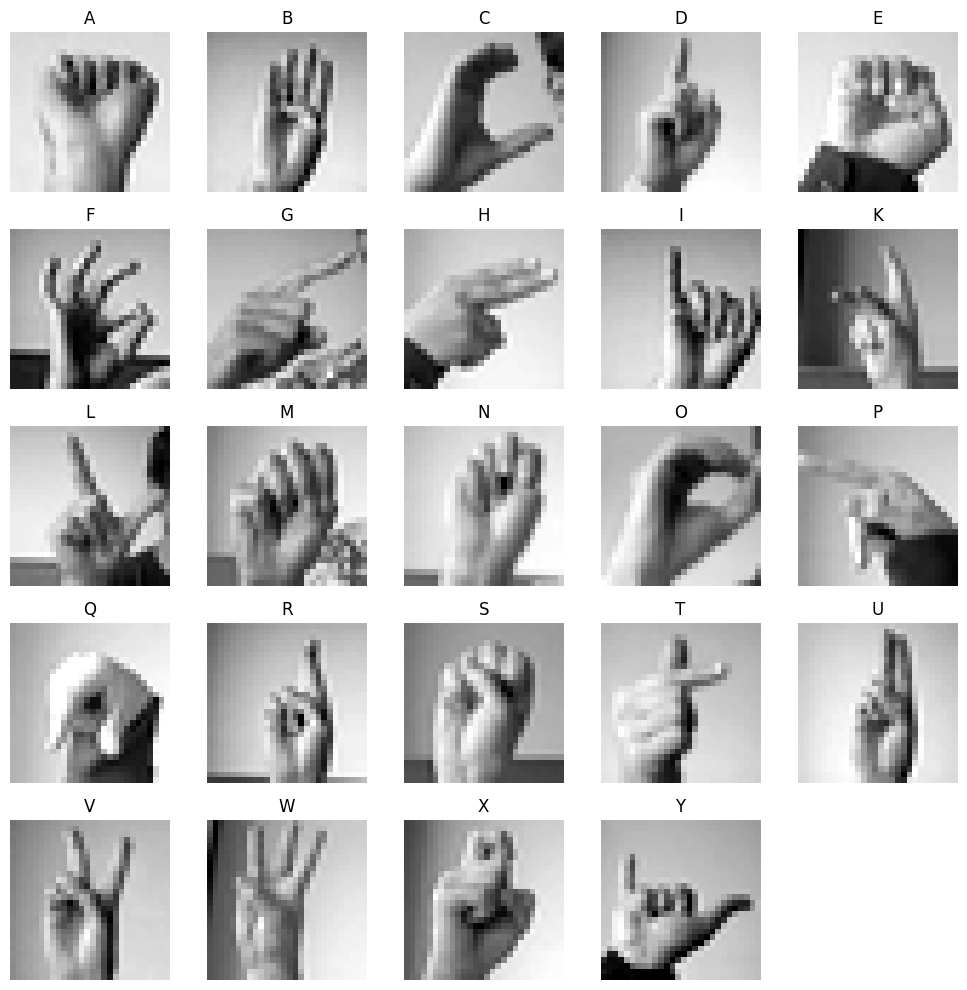

In [13]:
import matplotlib.pyplot as plt

labels = sorted(raw_train_df["label"].unique())

plt.figure(figsize=(10,10))

count = 1

for label in labels:

    row = raw_train_df[raw_train_df["label"] == label]

    if row.empty:
        continue  
    image = row.iloc[0].drop("label").values.reshape(28,28)

    plt.subplot(5,5,count)
    plt.imshow(image, cmap="gray")

    plt.title(chr(label + 65))  
    plt.axis("off")

    count += 1

plt.tight_layout()
plt.show()

